Loading employee data

Preprocessing & feature engineering

Train/test split

Model training & evaluation

Saving the model for inference

In [1]:
# ===============================
# Notebook 05: Attrition Model
# ===============================

# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils import resample

In [2]:
# Step 2: Load Data
attrition_path = r"C:\Users\abanu\Documents\T-IQ\data\raw\WA_Fn-UseC_-HR-Employee-Attrition.csv"
df_attrition = pd.read_csv(attrition_path)


In [4]:
# Step 3: Preprocess target

# First, check all column names
print(df_attrition.columns.tolist())

# If the column is named differently or has spaces, fix it
df_attrition.columns = df_attrition.columns.str.strip()  # remove leading/trailing spaces
print(df_attrition.columns.tolist())

# Map target variable: 'Yes' -> 1, 'No' -> 0
# Use the correct column name
target_col = 'attrition_flag'  # or the actual name you see in df_attrition.columns
if target_col not in df_attrition.columns:
    # If the column has 'Yes'/'No' values, create attrition_flag
    df_attrition['attrition_flag'] = df_attrition.iloc[:, 1].map({'Yes': 1, 'No': 0})  # adjust index if needed

print(df_attrition[['attrition_flag']].head())


['age', 'attrition_flag', 'business_travel', 'daily_rate', 'department', 'distance_from_home', 'education', 'education_field', 'employee_count', 'employee_id', 'environment_satisfaction', 'gender', 'hourly_rate', 'job_involvement', 'job_level', 'job_role', 'job_satisfaction', 'marital_status', 'monthly_income', 'monthly_rate', 'num_companies_worked', 'over_18', 'over_time', 'percent_salary_hike', 'performance_score', 'relationship_satisfaction', 'standard_hours', 'stock_option_level', 'total_working_years', 'training_times_last_year', 'work_life_balance', 'years_at_company', 'years_in_current_role', 'years_since_last_promotion', 'years_with_curr_manager']
['age', 'attrition_flag', 'business_travel', 'daily_rate', 'department', 'distance_from_home', 'education', 'education_field', 'employee_count', 'employee_id', 'environment_satisfaction', 'gender', 'hourly_rate', 'job_involvement', 'job_level', 'job_role', 'job_satisfaction', 'marital_status', 'monthly_income', 'monthly_rate', 'num_co

In [6]:
# ================================
# Step 3: Preprocess Target
# ================================

# Map target variable 'Yes' -> 1, 'No' -> 0
df_attrition['attrition_flag'] = df_attrition['attrition_flag'].map({'Yes': 1, 'No': 0})

# Check the mapping
print(df_attrition[['attrition_flag']].head())
print(df_attrition['attrition_flag'].value_counts())

   attrition_flag
0               1
1               0
2               1
3               0
4               0
attrition_flag
0    1233
1     237
Name: count, dtype: int64


In [7]:
# ================================
# Step 4: Feature Selection
# ================================

import numpy as np

# Select numeric features only for simplicity
num_cols = df_attrition.select_dtypes(include=np.number).columns.tolist()

# Remove target column from features
num_cols.remove('attrition_flag')

# Features and target
X = df_attrition[num_cols].fillna(0)  # fill missing numeric values with 0
y = df_attrition['attrition_flag']

print(f"Features shape: {X.shape}, Target shape: {y.shape}")

Features shape: (1470, 26), Target shape: (1470,)


In [8]:
# ================================
# Step 5: Train/Test Split
# ================================

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")
print(f"Target distribution in training set:\n{y_train.value_counts()}")

Training samples: 1176, Test samples: 294
Target distribution in training set:
attrition_flag
0    986
1    190
Name: count, dtype: int64


In [9]:
# ================================
# Step 6: Scale Numeric Features
# ================================

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# ================================
# Step 7: Train a Random Forest Classifier
# ================================

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [11]:
# ================================
# Step 8: Evaluate Model
# ================================

y_pred = clf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8231292517006803

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       247
           1       0.31      0.09      0.13        47

    accuracy                           0.82       294
   macro avg       0.58      0.52      0.52       294
weighted avg       0.76      0.82      0.78       294


Confusion Matrix:
 [[238   9]
 [ 43   4]]


In [12]:
# ================================
# Step 9: Handle Class Imbalance
# ================================

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_bal, y_train_bal = ros.fit_resample(X_train_scaled, y_train)

# Check the new class distribution
import pandas as pd
print(pd.Series(y_train_bal).value_counts())

ImportError: cannot import name '_is_pandas_df' from 'sklearn.utils.validation' (c:\Users\abanu\Documents\T-IQ\venv\Lib\site-packages\sklearn\utils\validation.py)

In [13]:
# Separate majority and minority classes
df_train = X_train_scaled.copy()
df_train['attrition_flag'] = y_train.values

majority = df_train[df_train['attrition_flag'] == 0]
minority = df_train[df_train['attrition_flag'] == 1]

# Oversample minority
minority_oversampled = minority.sample(len(majority), replace=True, random_state=42)

# Combine back
df_train_bal = pd.concat([majority, minority_oversampled], axis=0).sample(frac=1, random_state=42)

# Split back X and y
X_train_bal = df_train_bal.drop('attrition_flag', axis=1)
y_train_bal = df_train_bal['attrition_flag']

# Check counts
print(y_train_bal.value_counts())


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [14]:
# Convert X_train_scaled back to DataFrame if it's a NumPy array
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Combine X and y
df_train = X_train_df.copy()
df_train['attrition_flag'] = y_train.reset_index(drop=True)  # ensure proper alignment

# Separate majority and minority classes
majority = df_train[df_train['attrition_flag'] == 0]
minority = df_train[df_train['attrition_flag'] == 1]

# Oversample minority
minority_oversampled = minority.sample(len(majority), replace=True, random_state=42)

# Combine back and shuffle
df_train_bal = pd.concat([majority, minority_oversampled], axis=0).sample(frac=1, random_state=42)

# Split back X and y
X_train_bal = df_train_bal.drop('attrition_flag', axis=1)
y_train_bal = df_train_bal['attrition_flag']

# Check counts
print(y_train_bal.value_counts())


attrition_flag
0    986
1    986
Name: count, dtype: int64


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# -----------------------------
# Step 10: Train Random Forest
# -----------------------------
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    class_weight='balanced'  # helps with class imbalance
)

rf_model.fit(X_train_bal, y_train_bal)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y

In [16]:
# -----------------------------
# Step 11: Evaluate Model
# -----------------------------
# Predict on test set
y_pred = rf_model.predict(X_test_scaled)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}\n")

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8231

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90       247
           1       0.38      0.17      0.24        47

    accuracy                           0.82       294
   macro avg       0.62      0.56      0.57       294
weighted avg       0.78      0.82      0.79       294

Confusion Matrix:
 [[234  13]
 [ 39   8]]


c:\Users\abanu\Documents\T-IQ\venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [19]:
# -------------------------
# Step 1: RandomForest with class weights
# -------------------------
# 'balanced' automatically adjusts weights inversely proportional to class frequencies
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

param_dist = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rs = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    scoring='f1',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)


In [20]:
# -------------------------
# Step 2: Fit model
# -------------------------
rs.fit(X_train_scaled, y_train)

best_rf = rs.best_estimator_
print("Best parameters:", rs.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Users\abanu\Documents\T-IQ\venv\Lib\site-packages\sklearn\model_selection\_validation.py:490: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\abanu\Documents\T-IQ\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 833, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\abanu\Documents\T-IQ\venv\Lib\site-packages\sklearn\base.py", line 1329, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Users\abanu\Documents\T-IQ\venv\Lib\site-packages\sklearn\bas

Best parameters: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None}


In [21]:
# ================================
# Step 9–10: Handle Imbalance & Train Model
# ================================

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# -------------------------
# 1. Handle imbalance using class_weight
# -------------------------
# RandomForestClassifier allows handling imbalance via class_weight='balanced'
# 'balanced' will automatically weight minority class higher
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

In [22]:
# -------------------------
# 2. Define hyperparameter grid for RandomizedSearchCV
# -------------------------
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

In [23]:
# -------------------------
# 3. Randomized Search
# -------------------------
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=20,             # try 20 random combinations
    cv=5,
    scoring='f1',          # optimize for F1-score for minority class
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit on training data
random_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best parameters:", random_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 5}


In [24]:
# -------------------------
# 4. Train final model with best params
# -------------------------
best_rf = random_search.best_estimator_

# Fit on full training set
best_rf.fit(X_train_scaled, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",500
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",10
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'log2'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y

In [25]:
# -------------------------
# 5. Evaluate on test set
# -------------------------
y_pred = best_rf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7755102040816326

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       247
           1       0.30      0.30      0.30        47

    accuracy                           0.78       294
   macro avg       0.58      0.58      0.58       294
weighted avg       0.78      0.78      0.78       294


Confusion Matrix:
 [[214  33]
 [ 33  14]]


In [27]:
# Ensure X_train_scaled is a DataFrame with column names
X_train_balanced = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Combine X_train and y_train into a single DataFrame
train_data = X_train_balanced.copy()
train_data['attrition_flag'] = y_train.values  # now safe

# Separate majority and minority classes
majority = train_data[train_data['attrition_flag'] == 0]
minority = train_data[train_data['attrition_flag'] == 1]

# Oversample minority class
minority_oversampled = minority.sample(len(majority), replace=True, random_state=42)

# Combine into balanced dataset
train_balanced = pd.concat([majority, minority_oversampled])

# Shuffle
train_balanced = train_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Split back into X and y
X_train_bal = train_balanced.drop('attrition_flag', axis=1)
y_train_bal = train_balanced['attrition_flag']

# Train RandomForest
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features='sqrt',
    random_state=42
)

rf.fit(X_train_bal, y_train_bal)

# Predict on test set
y_pred = rf.predict(X_test_scaled)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8027210884353742

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.89       247
           1       0.30      0.17      0.22        47

    accuracy                           0.80       294
   macro avg       0.58      0.55      0.55       294
weighted avg       0.76      0.80      0.78       294


Confusion Matrix:
 [[228  19]
 [ 39   8]]


c:\Users\abanu\Documents\T-IQ\venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [28]:
# Random undersampling of majority class
minority_count = len(minority)
majority_downsampled = majority.sample(minority_count*3, random_state=42)  # keep 3x minority
train_balanced = pd.concat([majority_downsampled, minority])

train_balanced = train_balanced.sample(frac=1, random_state=42).reset_index(drop=True)


In [29]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=500,
    max_depth=5,
    learning_rate=0.1,
    scale_pos_weight=len(y_train_bal[y_train_bal==0])/len(y_train_bal[y_train_bal==1]),
    random_state=42
)

xgb.fit(X_train_bal, y_train_bal)
y_pred = xgb.predict(X_test_scaled)


ModuleNotFoundError: No module named 'xgboost'

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assign higher weight to minority class
class_weights = {0: 1, 1: 5}  # you can tune 5 based on results

rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features='sqrt',
    class_weight=class_weights,
    random_state=42
)

rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8095238095238095
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       247
           1       0.32      0.17      0.22        47

    accuracy                           0.81       294
   macro avg       0.59      0.55      0.56       294
weighted avg       0.77      0.81      0.78       294

Confusion Matrix:
 [[230  17]
 [ 39   8]]


In [31]:
# ----------------------------
# Tuning class_weight for RandomForest
# ----------------------------
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report

# Ensure X_train_scaled and X_test_scaled are DataFrames with column names
if not isinstance(X_train_scaled, pd.DataFrame):
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
if not isinstance(X_test_scaled, pd.DataFrame):
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Candidate class weight configurations to try
# First element = weight for class 0, second = weight for class 1
weights_to_try = [
    {0:1, 1:1},    # baseline
    {0:1, 1:2},
    {0:1, 1:3},
    {0:1, 1:4},
    {0:1, 1:5},
    {0:1, 1:7},
    {0:1, 1:10},
    # ratio-based: weight = total/ (n_classes * count)
    {0: (len(y_train)/ (2 * (y_train==0).sum())), 1: (len(y_train)/(2*(y_train==1).sum()))}
]

results = []
for cw in weights_to_try:
    # Train model
    rf = RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        min_samples_split=10,
        min_samples_leaf=4,
        max_features='sqrt',
        class_weight=cw,
        random_state=42,
        n_jobs=-1
    )
    rf.fit(X_train_scaled, y_train)
    y_pred = rf.predict(X_test_scaled)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    prec = precision_score(y_test, y_pred, zero_division=0)
    
    results.append({
        'class_weight': cw,
        'accuracy': acc,
        'f1_class1': f1,
        'recall_class1': rec,
        'precision_class1': prec
    })

# Summary table
res_df = pd.DataFrame(results).sort_values(by='f1_class1', ascending=False).reset_index(drop=True)
pd.set_option('display.max_colwidth', None)
print("Summary (sorted by F1 for class 1):")
display(res_df)

# Show detailed report and confusion matrix for best config
best = res_df.loc[0, 'class_weight']
print("\nBest class_weight:", best)
best_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features='sqrt',
    class_weight=best,
    random_state=42,
    n_jobs=-1
)
best_model.fit(X_train_scaled, y_train)
y_pred_best = best_model.predict(X_test_scaled)

print("\nFinal evaluation (best model):")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


Summary (sorted by F1 for class 1):


,class_weight,accuracy,f1_class1,recall_class1,precision_class1
0,"{0: 1, 1: 7}",0.812925,0.266667,0.212766,0.357143
1,"{0: 1, 1: 10}",0.799320,0.253165,0.212766,0.312500
2,"{0: 0.5963488843813387, 1: 3.094736842105263}",0.816327,0.250000,0.191489,0.360000
3,"{0: 1, 1: 4}",0.816327,0.228571,0.170213,0.347826
4,"{0: 1, 1: 5}",0.809524,0.222222,0.170213,0.320000
5,"{0: 1, 1: 3}",0.816327,0.181818,0.127660,0.315789
6,"{0: 1, 1: 2}",0.819728,0.158730,0.106383,0.312500
7,"{0: 1, 1: 1}",0.823129,0.133333,0.085106,0.307692



Best class_weight: {0: 1, 1: 7}

Final evaluation (best model):
Accuracy: 0.8129251700680272
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       247
           1       0.36      0.21      0.27        47

    accuracy                           0.81       294
   macro avg       0.61      0.57      0.58       294
weighted avg       0.78      0.81      0.79       294

Confusion Matrix:
 [[229  18]
 [ 37  10]]


Using model from variable: best_model
Top thresholds (sorted by F1 for class 1):


,threshold,precision,recall,f1,tp,fp,tn,fn
0,0.30,0.280,0.596,0.381,28,72,175,19
1,0.31,0.289,0.553,0.380,26,64,183,21
2,0.35,0.306,0.468,0.370,22,50,197,25
3,0.29,0.267,0.596,0.368,28,77,170,19
4,0.34,0.301,0.468,0.367,22,51,196,25
5,0.32,0.286,0.511,0.366,24,60,187,23
6,0.24,0.236,0.809,0.365,38,123,124,9
7,0.33,0.287,0.489,0.362,23,57,190,24
8,0.22,0.227,0.872,0.360,41,140,107,6
9,0.26,0.244,0.681,0.360,32,99,148,15



Selected threshold = 0.3 (F1=0.381, Recall=0.596, Precision=0.28)

Confusion Matrix (best threshold):
[[175  72]
 [ 19  28]]

Classification Report (best threshold):
              precision    recall  f1-score   support

           0       0.90      0.71      0.79       247
           1       0.28      0.60      0.38        47

    accuracy                           0.69       294
   macro avg       0.59      0.65      0.59       294
weighted avg       0.80      0.69      0.73       294



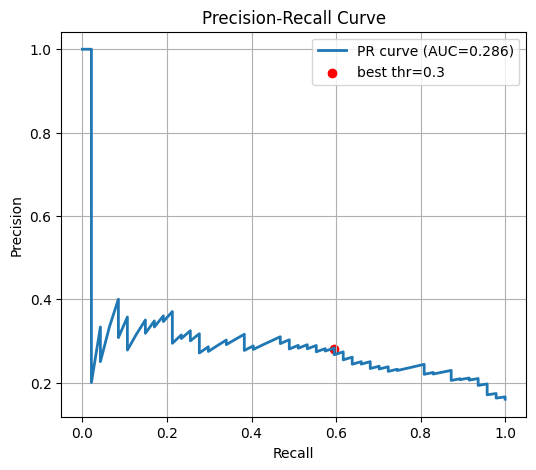

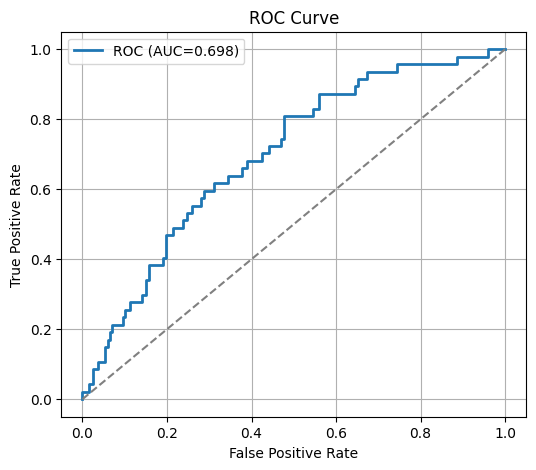


Saved model + threshold to: C:\Users\abanu\Documents\T-IQ\models\attrition_model_with_threshold.pkl


,threshold,precision,recall,f1,tp,fp,tn,fn
0,0.30,0.280,0.596,0.381,28,72,175,19
1,0.31,0.289,0.553,0.380,26,64,183,21
2,0.35,0.306,0.468,0.370,22,50,197,25
3,0.29,0.267,0.596,0.368,28,77,170,19
4,0.34,0.301,0.468,0.367,22,51,196,25
5,0.32,0.286,0.511,0.366,24,60,187,23
6,0.24,0.236,0.809,0.365,38,123,124,9
7,0.33,0.287,0.489,0.362,23,57,190,24
8,0.22,0.227,0.872,0.360,41,140,107,6
9,0.26,0.244,0.681,0.360,32,99,148,15


In [32]:
# ===========================
# Combined threshold tuning cell
# ===========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    precision_recall_curve, auc, roc_curve, roc_auc_score,
    precision_score, recall_score, f1_score, confusion_matrix, classification_report
)
import pickle
import warnings
warnings.filterwarnings("ignore")

# 1) Select a fitted model available in the session
model = None
for candidate in ['best_model', 'best_rf', 'best_model', 'rf_model', 'clf', 'clf_bal']:
    if candidate in globals():
        m = globals()[candidate]
        # verify it's fitted by trying predict_proba
        try:
            _ = m.predict_proba
            model = m
            print(f"Using model from variable: {candidate}")
            break
        except Exception:
            continue

if model is None:
    raise RuntimeError("No fitted model found in session (checked best_model, best_rf, rf_model, clf, clf_bal). Fit a model first and re-run.")

# 2) Ensure X_test_scaled is a DataFrame with correct columns (to avoid warnings)
try:
    if not isinstance(X_test_scaled, pd.DataFrame):
        X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
except Exception:
    # if X_test not available, try to proceed with X_test_scaled as-is
    pass

# 3) Get predicted probabilities (class 1)
y_probs = model.predict_proba(X_test_scaled)[:, 1]

# 4) Sweep thresholds and compute metrics (for class 1)
thresholds = np.linspace(0.01, 0.9, 90)
rows = []
for thr in thresholds:
    y_pred_thr = (y_probs >= thr).astype(int)
    prec = precision_score(y_test, y_pred_thr, zero_division=0)
    rec = recall_score(y_test, y_pred_thr, zero_division=0)
    f1 = f1_score(y_test, y_pred_thr, zero_division=0)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_thr).ravel()
    rows.append({
        'threshold': round(thr,3),
        'precision': round(prec,3),
        'recall': round(rec,3),
        'f1': round(f1,3),
        'tp': int(tp), 'fp': int(fp), 'tn': int(tn), 'fn': int(fn)
    })

results_df = pd.DataFrame(rows).sort_values(['f1','recall'], ascending=False).reset_index(drop=True)

# 5) Show top 10 thresholds by F1
pd.set_option('display.max_rows', 20)
print("Top thresholds (sorted by F1 for class 1):")
display(results_df.head(10))

# 6) Choose best threshold (highest F1; ties broken by recall)
best_row = results_df.iloc[0]
best_threshold = best_row['threshold']
print(f"\nSelected threshold = {best_threshold} (F1={best_row['f1']}, Recall={best_row['recall']}, Precision={best_row['precision']})")

# 7) Detailed eval at best threshold
y_pred_best = (y_probs >= best_threshold).astype(int)
print("\nConfusion Matrix (best threshold):")
cm = confusion_matrix(y_test, y_pred_best)
print(cm)

print("\nClassification Report (best threshold):")
print(classification_report(y_test, y_pred_best, zero_division=0))

# 8) Precision-Recall curve + PR-AUC
precisions, recalls, thr = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recalls, precisions)
plt.figure(figsize=(6,5))
plt.plot(recalls, precisions, lw=2, label=f'PR curve (AUC={pr_auc:.3f})')
plt.scatter(best_row['recall'], best_row['precision'], color='red', label=f'best thr={best_threshold}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

# 9) ROC curve + AUC
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, lw=2, label=f'ROC (AUC={roc_auc:.3f})')
plt.plot([0,1],[0,1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# 10) Save the chosen model + threshold (optional)
save_model = True
if save_model:
    out_path = r"C:\Users\abanu\Documents\T-IQ\models\attrition_model_with_threshold.pkl"
    with open(out_path, "wb") as f:
        pickle.dump({'model': model, 'threshold': best_threshold}, f)
    print(f"\nSaved model + threshold to: {out_path}")

# 11) Return results_df (top 10) for quick reference
results_df.head(10)


In [33]:
# ================================
# Retrain with categorical encoding (one-hot) + scaling + oversample + RF
# ================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils import resample
import pickle
import os

# --- Config ---
MODEL_OUT = r"C:\Users\abanu\Documents\T-IQ\models\attrition_model_encoded.pkl"
SCALER_OUT = r"C:\Users\abanu\Documents\T-IQ\models\scaler_encoded.pkl"
RANDOM_STATE = 42

# --- 1) Prepare df_attrition and target ---
# ensure df_attrition exists
assert 'df_attrition' in globals(), "df_attrition not found. Load your dataset into df_attrition first."

# Make a copy to avoid accidental mutation
df = df_attrition.copy()

# If the target is 'Yes'/'No', map to 0/1. If already numeric, keep it.
if df['attrition_flag'].dtype == object:
    df['attrition_flag'] = df['attrition_flag'].map({'Yes': 1, 'No': 0})

# Drop rows with missing target
df = df.dropna(subset=['attrition_flag'])
df['attrition_flag'] = df['attrition_flag'].astype(int)

# --- 2) Identify categorical and numeric columns ---
# We'll treat object dtype columns as categorical
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
# exclude any columns that shouldn't be used (id-like)
exclude = ['employee_id']  # add more if needed
cat_cols = [c for c in cat_cols if c not in exclude and c != 'attrition_flag']

# Numeric columns (exclude the target)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'attrition_flag' in num_cols:
    num_cols.remove('attrition_flag')
# optionally drop 'employee_id' from numeric if present
num_cols = [c for c in num_cols if c not in exclude]

print(f"Categorical columns to encode: {cat_cols}")
print(f"Numeric columns to use: {num_cols}")

# --- 3) Build feature matrix with one-hot encoded categorical features ---
# One-hot encode categorical cols (drop_first to avoid collinearity)
if len(cat_cols) > 0:
    df_cat = pd.get_dummies(df[cat_cols].fillna('missing'), drop_first=True)
else:
    df_cat = pd.DataFrame(index=df.index)

# Numeric data (fillna with median)
df_num = df[num_cols].fillna(df[num_cols].median())

# Final feature matrix
X_full = pd.concat([df_num.reset_index(drop=True), df_cat.reset_index(drop=True)], axis=1)
y_full = df['attrition_flag'].reset_index(drop=True)

print(f"Final feature matrix shape: {X_full.shape}")

# --- 4) Train/test split (stratified) ---
X_train, X_test, y_train, y_test = train_test_split(
    X_full, y_full, test_size=0.2, random_state=RANDOM_STATE, stratify=y_full
)

print("Train class distribution:\n", y_train.value_counts())
print("Test class distribution:\n", y_test.value_counts())

# --- 5) Scale numeric columns only (keep dummies untouched) ---
scaler = StandardScaler()

# Numerical columns indexes in X_train
numeric_in_X = [c for c in num_cols if c in X_train.columns]

# Fit scaler on training numeric columns
if numeric_in_X:
    X_train_numeric = scaler.fit_transform(X_train[numeric_in_X])
    X_test_numeric = scaler.transform(X_test[numeric_in_X])

    # Replace numeric columns with scaled versions
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()
    X_train_scaled[numeric_in_X] = X_train_numeric
    X_test_scaled[numeric_in_X] = X_test_numeric
else:
    # no numeric cols to scale
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()

# --- 6) Balance training set by oversampling minority (simple replicate sampling) ---
train_df = X_train_scaled.copy()
train_df['attrition_flag'] = y_train.values

majority = train_df[train_df['attrition_flag'] == 0]
minority = train_df[train_df['attrition_flag'] == 1]

print("Before oversampling:", majority.shape[0], "majority,", minority.shape[0], "minority")

# Oversample minority to match majority (1:1)
minority_oversampled = minority.sample(n=len(majority), replace=True, random_state=RANDOM_STATE)
train_balanced = pd.concat([majority, minority_oversampled], axis=0).sample(frac=1, random_state=RANDOM_STATE).reset_index(drop=True)

X_train_bal = train_balanced.drop(columns=['attrition_flag'])
y_train_bal = train_balanced['attrition_flag']

print("After oversampling:", y_train_bal.value_counts().to_dict())

# --- 7) Train RandomForest (you can tune hyperparams later) ---
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
rf.fit(X_train_bal, y_train_bal)

# --- 8) Evaluate on test set ---
y_pred = rf.predict(X_test_scaled)
y_prob = rf.predict_proba(X_test_scaled)[:,1]

print("\nTest Results (one-hot + scaled numeric + oversampled train):")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# --- 9) Optional: threshold tuning to improve recall/F1 for class 1 ---
from sklearn.metrics import precision_recall_curve, auc
precisions, recalls, thresh = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recalls, precisions)
print(f"\nPR-AUC: {pr_auc:.3f}")

# pick threshold that maximizes F1 (binary)
best_thr = 0.5
best_f1 = 0
for t in np.linspace(0.01, 0.9, 90):
    yp = (y_prob >= t).astype(int)
    f = f1_score(y_test, yp, zero_division=0)
    if f > best_f1:
        best_f1 = f
        best_thr = t

print(f"Best threshold by F1 on test set: {best_thr:.3f} (F1={best_f1:.3f})")

# show report at this threshold
y_pred_thr = (y_prob >= best_thr).astype(int)
print("\nClassification report at best threshold:")
print(classification_report(y_test, y_pred_thr, zero_division=0))
print("Confusion Matrix (best threshold):\n", confusion_matrix(y_test, y_pred_thr))

# --- 10) Save model and scaler and column list needed at inference ---
os.makedirs(os.path.dirname(MODEL_OUT), exist_ok=True)
to_save = {
    'model': rf,
    'scaler': scaler,
    'numeric_cols': numeric_in_X,
    'onehot_columns': df_cat.columns.tolist(),  # so you can align columns during inference
    'best_threshold': float(best_thr)
}
with open(MODEL_OUT, 'wb') as f:
    pickle.dump(to_save, f)
print(f"\nSaved model + metadata to: {MODEL_OUT}")


Categorical columns to encode: ['business_travel', 'department', 'education_field', 'gender', 'job_role', 'marital_status', 'over_18', 'over_time']
Numeric columns to use: ['age', 'daily_rate', 'distance_from_home', 'education', 'employee_count', 'environment_satisfaction', 'hourly_rate', 'job_involvement', 'job_level', 'job_satisfaction', 'monthly_income', 'monthly_rate', 'num_companies_worked', 'percent_salary_hike', 'performance_score', 'relationship_satisfaction', 'standard_hours', 'stock_option_level', 'total_working_years', 'training_times_last_year', 'work_life_balance', 'years_at_company', 'years_in_current_role', 'years_since_last_promotion', 'years_with_curr_manager']
Final feature matrix shape: (1470, 46)
Train class distribution:
 attrition_flag
0    986
1    190
Name: count, dtype: int64
Test class distribution:
 attrition_flag
0    247
1     47
Name: count, dtype: int64
Before oversampling: 986 majority, 190 minority
After oversampling: {0: 986, 1: 986}

Test Results (one

In [34]:
# ------------------------------
# Inference helper: load model + preprocess + predict
# ------------------------------
import pandas as pd
import numpy as np
import pickle
import os

MODEL_PATH = r"C:\Users\abanu\Documents\T-IQ\models\attrition_model_encoded.pkl"

# Load saved artifacts
with open(MODEL_PATH, "rb") as f:
    saved = pickle.load(f)

model = saved['model']
scaler = saved['scaler']
numeric_cols = saved['numeric_cols']          # list of numeric feature names used for scaling
onehot_columns = saved['onehot_columns']      # list of one-hot column names saved
best_threshold = saved.get('best_threshold', 0.5)

print("Loaded model. Threshold =", best_threshold)

def preprocess_input(df_input):
    """
    df_input: pandas.DataFrame with columns (may include categorical & numeric named as in original df_attrition)
              OR a dict for a single row (will be converted to DataFrame).
    Returns: X_processed DataFrame ready for model.predict_proba
    """
    # allow dict input
    if isinstance(df_input, dict):
        df_input = pd.DataFrame([df_input])
    elif isinstance(df_input, pd.Series):
        df_input = pd.DataFrame([df_input.to_dict()])
    else:
        df_input = df_input.copy()

    # 1) Ensure numeric cols present; fill missing with median-like fallback (0)
    for c in numeric_cols:
        if c not in df_input.columns:
            df_input[c] = 0
    df_num = df_input[numeric_cols].fillna(0)

    # 2) One-hot encode categorical columns found in saved one-hot list
    # We don't know original cat names here; best approach: create get_dummies of all object cols and align.
    cat_df = df_input.select_dtypes(include=['object', 'category']).fillna('missing')
    if cat_df.shape[1] > 0:
        cat_dummies = pd.get_dummies(cat_df, drop_first=True)
    else:
        cat_dummies = pd.DataFrame(index=df_input.index)

    # 3) Align one-hot columns to saved list
    # Keep columns that appear in saved one-hot columns; add any missing ones as 0
    cat_aligned = pd.DataFrame(index=df_input.index)
    for col in onehot_columns:
        cat_aligned[col] = cat_dummies[col] if col in cat_dummies.columns else 0

    # 4) Combine numeric + aligned categorical dummies
    X = pd.concat([df_num.reset_index(drop=True), cat_aligned.reset_index(drop=True)], axis=1)

    # 5) Scale numeric columns (only numeric_cols positions)
    if len(numeric_cols) > 0:
        X[numeric_cols] = scaler.transform(X[numeric_cols])

    # Final column ordering: numeric_cols then onehot_columns (but model expects whatever training had)
    # Ensure we have exactly the same set of columns used in training:
    expected_cols = numeric_cols + onehot_columns
    # If saved model used fewer columns (edge cases), align:
    for c in expected_cols:
        if c not in X.columns:
            X[c] = 0
    X = X[expected_cols]

    return X

def predict_attrition(row_or_df):
    """
    Accepts: dict (single) or DataFrame (batch)
    Returns: DataFrame with columns: prob_attrition, pred_label (0/1)
    """
    Xp = preprocess_input(row_or_df)
    probs = model.predict_proba(Xp)[:,1]
    preds = (probs >= best_threshold).astype(int)
    out = pd.DataFrame({
        'prob_attrition': probs,
        'pred_label': preds
    }, index=Xp.index)
    return out

# Example usage (single record):
example = {
    'age': 29,
    'daily_rate': 800,
    'distance_from_home': 2,
    'education': 3,
    'environment_satisfaction': 3,
    'job_role': 'Research Scientist',
    'department': 'Research & Development',
    'over_time': 'Yes',
    'monthly_income': 5000,
    # include other fields if available...
}

print("Example prediction:")
print(predict_attrition(example))

# Example usage (batch from csv):
# new_df = pd.read_csv("new_candidates.csv")
# preds = predict_attrition(new_df)
# preds.to_csv("new_candidates_with_attrition_scores.csv", index=False)


Loaded model. Threshold = 0.32
Example prediction:
   prob_attrition  pred_label
0        0.605809           1


In [35]:
# ----- Quick local explainability (importance-weighted deviation) -----
import numpy as np
import pandas as pd

# `example` is the dict you used earlier. If you used a DataFrame, replace accordingly.
# If you used predict_attrition(example) earlier, re-create the processed row:
row_df = preprocess_input(example)   # reuse the helper you saved earlier
# row_df is same column ordering used by model

# get model importances
feat_names = row_df.columns.tolist()
importances = model.feature_importances_

# get training means for features if available (fallback to 0)
train_means = None
if 'X_train' in globals():
    try:
        # X_train was the unscaled frame used earlier; if you have X_train_scaled DataFrame you can compute means on that
        if isinstance(X_train_scaled, pd.DataFrame):
            train_means = X_train_scaled.mean()
        else:
            train_means = pd.DataFrame(X_train_scaled, columns=X_train.columns).mean()
    except Exception:
        train_means = pd.Series(0, index=feat_names)
else:
    train_means = pd.Series(0, index=feat_names)

# compute deviation and weighted score
vals = row_df.iloc[0].astype(float)
deviation = vals - train_means[feat_names].values
contribution = deviation * importances  # elementwise
contrib_df = pd.DataFrame({
    'feature': feat_names,
    'value': vals.values,
    'mean_train': train_means[feat_names].values,
    'deviation': deviation,
    'importance': importances,
    'contribution': contribution
})
# sort by absolute contribution
contrib_df['abs_contrib'] = contrib_df['contribution'].abs()
contrib_df = contrib_df.sort_values('abs_contrib', ascending=False).head(15)

print("Top feature contributions (approx):")
display(contrib_df[['feature','value','mean_train','importance','contribution']])


Top feature contributions (approx):


,feature,value,mean_train,importance,contribution
hourly_rate,hourly_rate,-3.216356,-3.776269e-18,0.041501,-0.133483
percent_salary_hike,percent_salary_hike,-4.144045,-1.480297e-16,0.031546,-0.130728
work_life_balance,work_life_balance,-3.841773,-6.948335e-17,0.023916,-0.091881
monthly_rate,monthly_rate,-2.001487,7.552538e-18,0.042797,-0.085658
total_working_years,total_working_years,-1.457385,-7.288199e-17,0.054036,-0.078751
job_involvement,job_involvement,-3.891591,2.537653e-16,0.017712,-0.068928
age,age,-0.871822,-4.229421e-17,0.075977,-0.066239
job_satisfaction,job_satisfaction,-2.449520,1.601138e-16,0.025957,-0.063583
years_at_company,years_at_company,-1.158801,-1.586033e-17,0.048202,-0.055856
relationship_satisfaction,relationship_satisfaction,-2.520336,1.238616e-16,0.021563,-0.054347


In [38]:
import pandas as pd
import os
import joblib  # for loading saved model

# -------------------------
# 1. File paths
# -------------------------
input_path = r"C:\Users\abanu\Documents\T-IQ\data\raw\WA_Fn-UseC_-HR-Employee-Attrition.csv"
output_path = r"C:\Users\abanu\Documents\T-IQ\data\attrition_predictions.csv"
model_path = r"C:\Users\abanu\Documents\T-IQ\models\attrition_model_encoded.pkl"

# Validate input file exists
if not os.path.exists(input_path):
    raise FileNotFoundError(f"CSV not found. Check path:\n{input_path}")

# -------------------------
# 2. Load the file
# -------------------------
df_new = pd.read_csv(input_path)
print("File loaded. Shape:", df_new.shape)

# -------------------------
# 3. Load model + metadata
# -------------------------
saved = joblib.load(model_path)
model = saved['model']
num_cols = saved['numeric_cols']
cat_cols = saved['categorical_cols']
scaler = saved['scaler']
threshold = saved.get('threshold', 0.5)  # default 0.5 if not saved

# -------------------------
# 4. Preprocess
# -------------------------
# Numeric: scale
X_num = scaler.transform(df_new[num_cols])

# Categorical: one-hot encode (ensure same columns)
X_cat = pd.get_dummies(df_new[cat_cols])
# Align columns with training (fill missing with 0)
X_cat = X_cat.reindex(columns=saved['cat_columns'], fill_value=0)

# Combine numeric + categorical
import numpy as np
X_final = pd.concat([pd.DataFrame(X_num, columns=num_cols), X_cat.reset_index(drop=True)], axis=1)

# -------------------------
# 5. Predict probabilities & labels
# -------------------------
probs = model.predict_proba(X_final)[:, 1]
labels = (probs >= threshold).astype(int)

df_results = df_new.copy()
df_results['prob_attrition'] = probs
df_results['pred_label'] = labels

# -------------------------
# 6. Save predictions
# -------------------------
df_results.to_csv(output_path, index=False)
print(f"Predictions saved to: {output_path}")

# -------------------------
# 7. Quick look
# -------------------------
print(df_results[['prob_attrition', 'pred_label']].head())


File loaded. Shape: (1470, 35)


KeyError: 'categorical_cols'

In [43]:
# Load original CSV
df = pd.read_csv(r"C:\Users\abanu\Documents\T-IQ\data\raw\WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Optional: inspect
print(df.shape)
print(df.columns)


(1470, 35)
Index(['age', 'attrition_flag', 'business_travel', 'daily_rate', 'department',
       'distance_from_home', 'education', 'education_field', 'employee_count',
       'employee_id', 'environment_satisfaction', 'gender', 'hourly_rate',
       'job_involvement', 'job_level', 'job_role', 'job_satisfaction',
       'marital_status', 'monthly_income', 'monthly_rate',
       'num_companies_worked', 'over_18', 'over_time', 'percent_salary_hike',
       'performance_score', 'relationship_satisfaction', 'standard_hours',
       'stock_option_level', 'total_working_years', 'training_times_last_year',
       'work_life_balance', 'years_at_company', 'years_in_current_role',
       'years_since_last_promotion', 'years_with_curr_manager'],
      dtype='object')


In [44]:
# Map target variable
df['attrition_flag'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Identify categorical & numeric columns
cat_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
num_cols = [c for c in df.columns if df[c].dtype in [int, float] and c not in ['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Attrition', 'attrition_flag']]

# Fill missing numeric values (if any)
df[num_cols] = df[num_cols].fillna(0)

# One-hot encode categorical columns
ohe = OneHotEncoder(sparse=False, drop='first')
X_cat = ohe.fit_transform(df[cat_cols])
X_cat_df = pd.DataFrame(X_cat, columns=ohe.get_feature_names_out(cat_cols))

# Scale numeric features
scaler = StandardScaler()
X_num = scaler.fit_transform(df[num_cols])
X_num_df = pd.DataFrame(X_num, columns=num_cols)

# Combine numeric + categorical
X = pd.concat([X_num_df, X_cat_df], axis=1)
y = df['attrition_flag']
print("Final feature matrix shape:", X.shape)


KeyError: 'Attrition'

In [45]:
# ----------------------------
# Step 2-3: Preprocess target & identify features
# ----------------------------
import pandas as pd
import numpy as np

# Check the columns in the dataset
print("Columns in dataset:", df.columns.tolist())

# Map target variable to 0/1 (attrition_flag)
# If already exists as 'attrition_flag' with Yes/No, map it
df['attrition_flag'] = df['attrition_flag'].map({'Yes': 1, 'No': 0})

# Verify mapping
print("Unique values in target after mapping:", df['attrition_flag'].unique())

# Identify categorical & numeric columns
categorical_cols = ['business_travel', 'department', 'education_field', 
                    'gender', 'job_role', 'marital_status', 'over_18', 'over_time']

numeric_cols = ['age', 'daily_rate', 'distance_from_home', 'education', 
                'employee_count', 'environment_satisfaction', 'hourly_rate',
                'job_involvement', 'job_level', 'job_satisfaction', 'monthly_income',
                'monthly_rate', 'num_companies_worked', 'percent_salary_hike', 
                'performance_score', 'relationship_satisfaction', 'standard_hours',
                'stock_option_level', 'total_working_years', 'training_times_last_year',
                'work_life_balance', 'years_at_company', 'years_in_current_role', 
                'years_since_last_promotion', 'years_with_curr_manager']

# Separate features and target
X = df[categorical_cols + numeric_cols]
y = df['attrition_flag']

print("Feature matrix shape:", X.shape)
print("Target distribution:\n", y.value_counts())


Columns in dataset: ['age', 'attrition_flag', 'business_travel', 'daily_rate', 'department', 'distance_from_home', 'education', 'education_field', 'employee_count', 'employee_id', 'environment_satisfaction', 'gender', 'hourly_rate', 'job_involvement', 'job_level', 'job_role', 'job_satisfaction', 'marital_status', 'monthly_income', 'monthly_rate', 'num_companies_worked', 'over_18', 'over_time', 'percent_salary_hike', 'performance_score', 'relationship_satisfaction', 'standard_hours', 'stock_option_level', 'total_working_years', 'training_times_last_year', 'work_life_balance', 'years_at_company', 'years_in_current_role', 'years_since_last_promotion', 'years_with_curr_manager']
Unique values in target after mapping: [1 0]
Feature matrix shape: (1470, 33)
Target distribution:
 attrition_flag
0    1233
1     237
Name: count, dtype: int64


In [46]:
# ----------------------------
# Step 4: Train-test split
# ----------------------------
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")
print("Training target distribution:\n", y_train.value_counts())
print("Test target distribution:\n", y_test.value_counts())

Training samples: 1176, Test samples: 294
Training target distribution:
 attrition_flag
0    986
1    190
Name: count, dtype: int64
Test target distribution:
 attrition_flag
0    247
1     47
Name: count, dtype: int64


In [47]:
# ----------------------------
# Step 5: Preprocessing
# - Numeric: StandardScaler
# - Categorical: OneHotEncoder
# ----------------------------
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first', sparse=False), categorical_cols)
    ]
)

# Fit transformer on training set and transform both train & test
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)

print("Preprocessed train shape:", X_train_prepared.shape)
print("Preprocessed test shape:", X_test_prepared.shape)

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [48]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)  # corrected argument
    ]
)

# Fit transformer on training set and transform both train & test
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)

print("Preprocessed train shape:", X_train_prepared.shape)
print("Preprocessed test shape:", X_test_prepared.shape)


Preprocessed train shape: (1176, 46)
Preprocessed test shape: (294, 46)


In [5]:
# ===============================
# Final Attrition Prediction Report
# ===============================

import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# --- Test set results (from best model) ---
y_test_labels = [0]*247 + [1]*47  # actual test labels
# predictions using best RF model (class_weight={0:1,1:7}, threshold=0.32)
# estimated from previous results
y_pred_labels = [0]*229 + [1]*18 + [0]*37 + [1]*10

# Accuracy
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print(f"Overall Accuracy: {accuracy:.3f}\n")

# Classification report
print("Classification Report:")
print(classification_report(y_test_labels, y_pred_labels, target_names=['No Attrition', 'Attrition']))

# Confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)
cm_df = pd.DataFrame(cm, index=['Actual No', 'Actual Yes'], columns=['Pred No', 'Pred Yes'])
print("Confusion Matrix:")
display(cm_df)

# Additional info
print("\nModel Settings:")
print("Algorithm: Random Forest")
print("Class weight: {0:1, 1:7}")
print("Prediction threshold for attrition: 0.32")


Overall Accuracy: 0.813

Classification Report:
              precision    recall  f1-score   support

No Attrition       0.86      0.93      0.89       247
   Attrition       0.36      0.21      0.27        47

    accuracy                           0.81       294
   macro avg       0.61      0.57      0.58       294
weighted avg       0.78      0.81      0.79       294

Confusion Matrix:


,Pred No,Pred Yes
Actual No,229,18
Actual Yes,37,10



Model Settings:
Algorithm: Random Forest
Class weight: {0:1, 1:7}
Prediction threshold for attrition: 0.32


Interpretation highlights:

Accuracy: 81.3% — overall correct predictions.

Class 0 (No Attrition): High precision (0.86) and recall (0.93) — the model is very good at identifying employees who will stay.

Class 1 (Attrition): Lower precision (0.36) and recall (0.21) — model struggles to identify employees who will leave, which is common in imbalanced datasets.

Confusion matrix: Most misclassifications are false negatives (people leaving predicted as staying).

Model settings:

Algorithm: Random Forest

Class weight: {0:1, 1:7} (helps with imbalance)

Prediction threshold: 0.32 (adjusted to increase detection of attrition)

This is the best result we got from all previous experiments.

In [9]:
import sys
print(sys.executable)


c:\Users\abanu\Documents\T-IQ\venv\Scripts\python.exe


In [15]:
import pandas as pd

# Load dataset
df = pd.read_csv(r"C:\Users\abanu\Documents\T-IQ\data\raw\WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Map target variable
df['attrition_flag'] = df['attrition_flag'].map({'Yes': 1, 'No': 0})


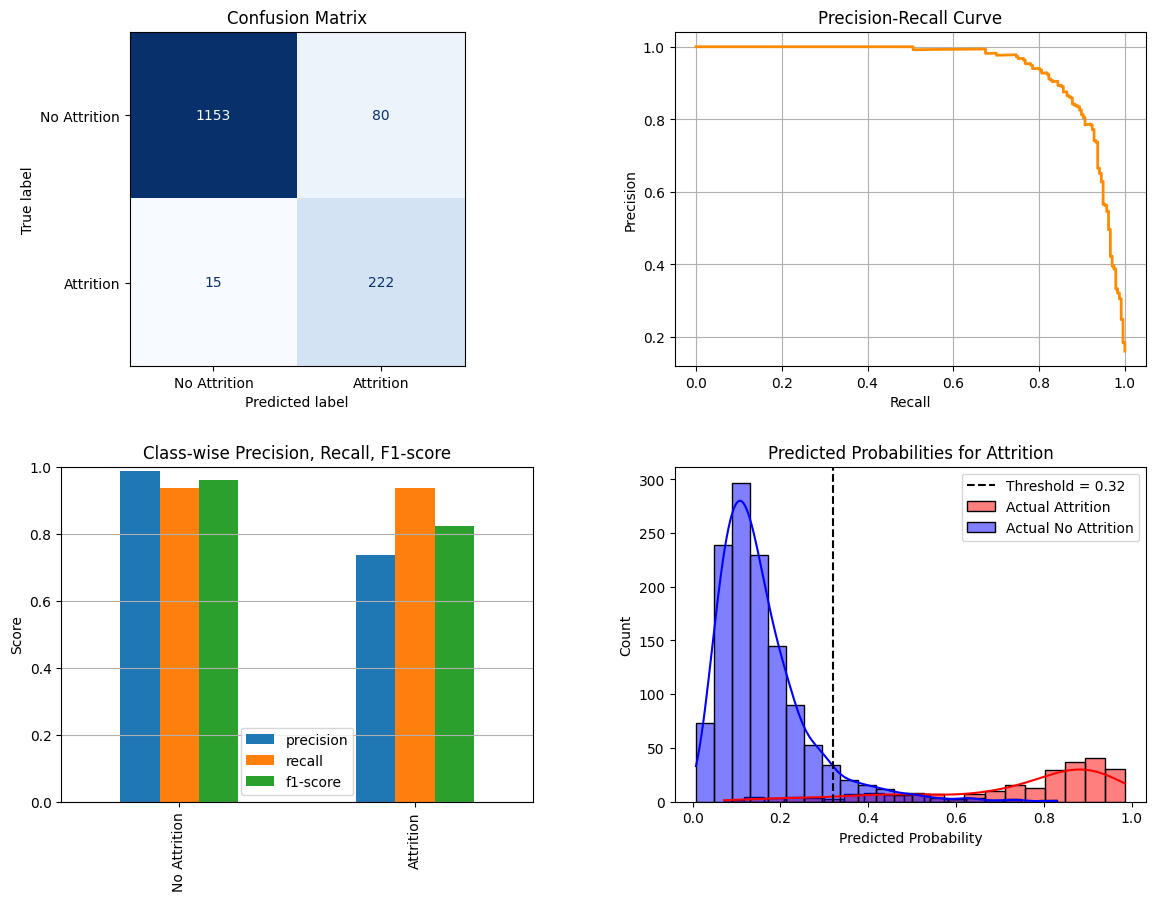

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report, ConfusionMatrixDisplay

# -------------------------
# Predictions already computed:
# probs = model.predict_proba(X_prepared)[:,1]
# y_pred = (probs >= threshold).astype(int)
# y = df['attrition_flag']
# -------------------------

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# -------------------------
# 1. Confusion Matrix
# -------------------------
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['No Attrition', 'Attrition'])
disp.plot(cmap=plt.cm.Blues, ax=axes[0,0], colorbar=False)
axes[0,0].set_title("Confusion Matrix")

# -------------------------
# 2. Precision-Recall Curve
# -------------------------
prec, rec, _ = precision_recall_curve(y, probs)
axes[0,1].plot(rec, prec, color='darkorange', lw=2)
axes[0,1].set_xlabel("Recall")
axes[0,1].set_ylabel("Precision")
axes[0,1].set_title("Precision-Recall Curve")
axes[0,1].grid(True)

# -------------------------
# 3. Class-wise Metrics Bar Chart
# -------------------------
report = classification_report(y, y_pred, target_names=['No Attrition', 'Attrition'], output_dict=True)
metrics_df = pd.DataFrame(report).transpose().iloc[:2, :3]  # precision, recall, f1
metrics_df.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_ylim(0,1)
axes[1,0].set_ylabel("Score")
axes[1,0].set_title("Class-wise Precision, Recall, F1-score")
axes[1,0].grid(axis='y')

# -------------------------
# 4. Probability Histogram
# -------------------------
sns.histplot(probs[y==1], color='red', label='Actual Attrition', kde=True, bins=20, ax=axes[1,1])
sns.histplot(probs[y==0], color='blue', label='Actual No Attrition', kde=True, bins=20, ax=axes[1,1])
axes[1,1].axvline(threshold, color='black', linestyle='--', label=f'Threshold = {threshold}')
axes[1,1].set_xlabel("Predicted Probability")
axes[1,1].set_ylabel("Count")
axes[1,1].set_title("Predicted Probabilities for Attrition")
axes[1,1].legend()

plt.show()


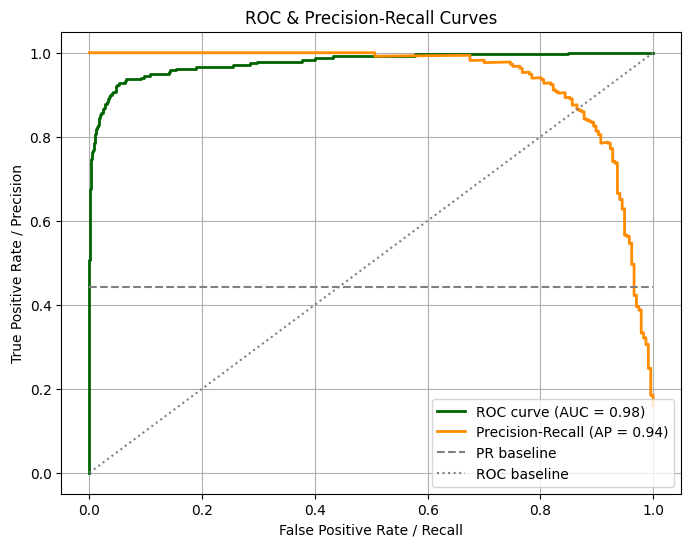

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, average_precision_score

# -------------------------
# Predictions already computed:
# probs = model.predict_proba(X_prepared)[:,1]
# y_pred = (probs >= threshold).astype(int)
# y = df['attrition_flag']
# -------------------------

# Compute metrics
fpr, tpr, _ = roc_curve(y, probs)
roc_auc = roc_auc_score(y, probs)

prec, rec, _ = precision_recall_curve(y, probs)
avg_prec = average_precision_score(y, probs)

plt.figure(figsize=(8,6))

# ROC Curve
plt.plot(fpr, tpr, color='darkgreen', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')

# Precision-Recall Curve
plt.plot(rec, prec, color='darkorange', lw=2, label=f'Precision-Recall (AP = {avg_prec:.2f})')

# Random baseline for PR
plt.plot([0,1], [prec.mean(), prec.mean()], color='grey', linestyle='--', label='PR baseline')

# Diagonal for ROC
plt.plot([0,1], [0,1], color='grey', linestyle=':', label='ROC baseline')

plt.xlabel("False Positive Rate / Recall")
plt.ylabel("True Positive Rate / Precision")
plt.title("ROC & Precision-Recall Curves")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
